In [ ]:
import numpy as np
import keras
from keras import layers
from sklearn.model_selection import train_test_split
from helpers import transform_features
from matplotlib import pyplot as plt

In [27]:
def train(bits, streams, challenges, responses):
    X_train, X_test, y_train, y_test = train_test_split(challenges, responses, test_size=0.1, random_state=42)
    
    model = keras.Sequential([
        layers.Dense(int(2 ** (streams) / 2), activation='tanh', 
                    input_dim=bits, kernel_initializer=keras.initializers.RandomNormal()),
        layers.Dense(int(2 ** (streams)), activation='tanh'),
        layers.Dense(int(2 ** (streams) / 2), activation='tanh'),
        layers.Dense(1, activation='sigmoid')
    ])
    
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    history = model.fit(
        X_train, y_train,
        epochs=60,
        batch_size=10000,
        shuffle=True,
        validation_split=0.01,
        verbose=0
    )

    results = model.evaluate(X_test, y_test, verbose=0)

    return history.history['accuracy'], history.history['val_accuracy'], results


In [8]:
def load_data(noise, k, crps):
    folder = f"crps/xor_puf/{noise}"
    
    chal_file = f"{folder}/{k}XOR_64bit_chal_{crps}.memmap"
    resp_file = f"{folder}/{k}XOR_64bit_resp_{crps}.memmap"
    
    challenges = transform_features(np.memmap(chal_file, shape=(crps, 64)))
    responses = np.memmap(resp_file, shape=(crps))
    
    return challenges, responses

In [23]:
xor_configs = [
    {'k': 4, 'crps': 1_000_000},
    {'k': 5, 'crps': 1_000_000},
    {'k': 6, 'crps': 2_000_000},
    {'k': 7, 'crps': 2_000_000},
    {'k': 8, 'crps': 5_000_000},
    {'k': 9, 'crps': 5_000_000}
]

noise_levels = ['0noise', '5noise', '10noise', '20noise', '20noise_majority']
n_bits = 64


In [ ]:

results = {
    config['k']: {
        noise: {
            'train_acc': [],
            'val_acc': []
        } for noise in noise_levels
    } for config in xor_configs
}


In [10]:
k = 4
crps = 1_000_000

for noise in noise_levels:
    X, Y = load_data(noise, k, crps)
    train_acc, val_acc, accuracies = train(n_bits, k, X, Y)
            
    results[k][noise]['train_acc'] = train_acc
    results[k][noise]['val_acc'] = val_acc
            
    print(f"Completed {k}-XOR with {noise} (CRPs: {crps//1_000_000}M) { accuracies }")

Completed 4-XOR with 0noise (CRPs: 1M) [0.022122927010059357, 0.9916800260543823]
Completed 4-XOR with 5noise (CRPs: 1M) [0.2314932644367218, 0.9356300234794617]
Completed 4-XOR with 10noise (CRPs: 1M) [0.34314805269241333, 0.8922500014305115]
Completed 4-XOR with 20noise (CRPs: 1M) [0.5124124884605408, 0.7917199730873108]
Completed 4-XOR with 20noise_majority (CRPs: 1M) [0.2386106699705124, 0.9351400136947632]


In [11]:
k = 5
crps = 1_000_000
for noise in noise_levels:
    X, Y = load_data(noise, k, crps)
    train_acc, val_acc, accuracies = train(n_bits, k, X, Y)
            
    results[k][noise]['train_acc'] = train_acc
    results[k][noise]['val_acc'] = val_acc
            
    print(f"Completed {k}-XOR with {noise} (CRPs: {crps//1_000_000}M) { accuracies }")

Completed 5-XOR with 0noise (CRPs: 1M) [0.015545900911092758, 0.9936400055885315]
Completed 5-XOR with 5noise (CRPs: 1M) [0.2133270502090454, 0.9429699778556824]
Completed 5-XOR with 10noise (CRPs: 1M) [0.3428003489971161, 0.890779972076416]
Completed 5-XOR with 20noise (CRPs: 1M) [0.5095967054367065, 0.79339998960495]
Completed 5-XOR with 20noise_majority (CRPs: 1M) [0.23630283772945404, 0.9350500106811523]


In [12]:
k = 6
crps = 2_000_000
for noise in noise_levels:
    X, Y = load_data(noise, k, crps)
    train_acc, val_acc, accuracies = train(n_bits, k, X, Y)
            
    results[k][noise]['train_acc'] = train_acc
    results[k][noise]['val_acc'] = val_acc
            
    print(f"Completed {k}-XOR with {noise} (CRPs: {crps//1_000_000}M) { accuracies }")

Completed 6-XOR with 0noise (CRPs: 2M) [0.01392754539847374, 0.9942049980163574]
Completed 6-XOR with 5noise (CRPs: 2M) [0.20985384285449982, 0.9436799883842468]
Completed 6-XOR with 10noise (CRPs: 2M) [0.33396202325820923, 0.8941149711608887]
Completed 6-XOR with 20noise (CRPs: 2M) [0.5075501799583435, 0.7935550212860107]
Completed 6-XOR with 20noise_majority (CRPs: 2M) [0.23034805059432983, 0.9362949728965759]


In [13]:
k = 7
crps = 2_000_000
for noise in noise_levels:
    X, Y = load_data(noise, k, crps)
    train_acc, val_acc, accuracies = train(n_bits, k, X, Y)
            
    results[k][noise]['train_acc'] = train_acc
    results[k][noise]['val_acc'] = val_acc
            
    print(f"Completed {k}-XOR with {noise} (CRPs: {crps//1_000_000}M) { accuracies }")

Completed 7-XOR with 0noise (CRPs: 2M) [0.01961417682468891, 0.9915900230407715]
Completed 7-XOR with 5noise (CRPs: 2M) [0.2104250192642212, 0.9419699907302856]
Completed 7-XOR with 10noise (CRPs: 2M) [0.3380940556526184, 0.8910199999809265]
Completed 7-XOR with 20noise (CRPs: 2M) [0.5109935998916626, 0.7901049852371216]
Completed 7-XOR with 20noise_majority (CRPs: 2M) [0.23647721111774445, 0.9328399896621704]


In [ ]:
k = 8
crps = 5_000_000

accuracy = 0
accuracies = []
for noise in noise_levels:
    X, Y = load_data(noise, k, crps)

    train_acc, val_acc, accuracies = train(n_bits, k, X, Y)

    results[k][noise]['train_acc'] = train_acc
    results[k][noise]['val_acc'] = val_acc
    
    print(f"Completed {k}-XOR with {noise} (CRPs: {crps//1_000_000}M) { accuracies }")


Completed 8-XOR with 0noise (CRPs: 5M) [0.020738523453474045, 0.9910439848899841]
Completed 8-XOR with 5noise (CRPs: 5M) [0.21642577648162842, 0.9399719834327698]
Completed 8-XOR with 10noise (CRPs: 5M) [0.33885496854782104, 0.8908299803733826]
Completed 8-XOR with 20noise (CRPs: 5M) [0.7038009166717529, 0.5003880262374878]
Completed 8-XOR with 20noise_majority (CRPs: 5M) [0.23760312795639038, 0.9328979849815369]


In [15]:

k = 9
crps = 5_000_000
for noise in noise_levels:
    X, Y = load_data(noise, k, crps)
    train_acc, val_acc, accuracies = train(n_bits, 8, X, Y)
            
    results[k][noise]['train_acc'] = train_acc
    results[k][noise]['val_acc'] = val_acc
            
    print(f"Completed {k}-XOR with {noise} (CRPs: {crps//1_000_000}M) { accuracies }")

Completed 9-XOR with 0noise (CRPs: 5M) [0.023505888879299164, 0.9898660182952881]
Completed 9-XOR with 5noise (CRPs: 5M) [0.2172061651945114, 0.939329981803894]
Completed 9-XOR with 10noise (CRPs: 5M) [0.3424878716468811, 0.8881999850273132]
Completed 9-XOR with 20noise (CRPs: 5M) [0.7034947872161865, 0.4994199872016907]
Completed 9-XOR with 20noise_majority (CRPs: 5M) [0.24002458155155182, 0.9307720065116882]


Plotting

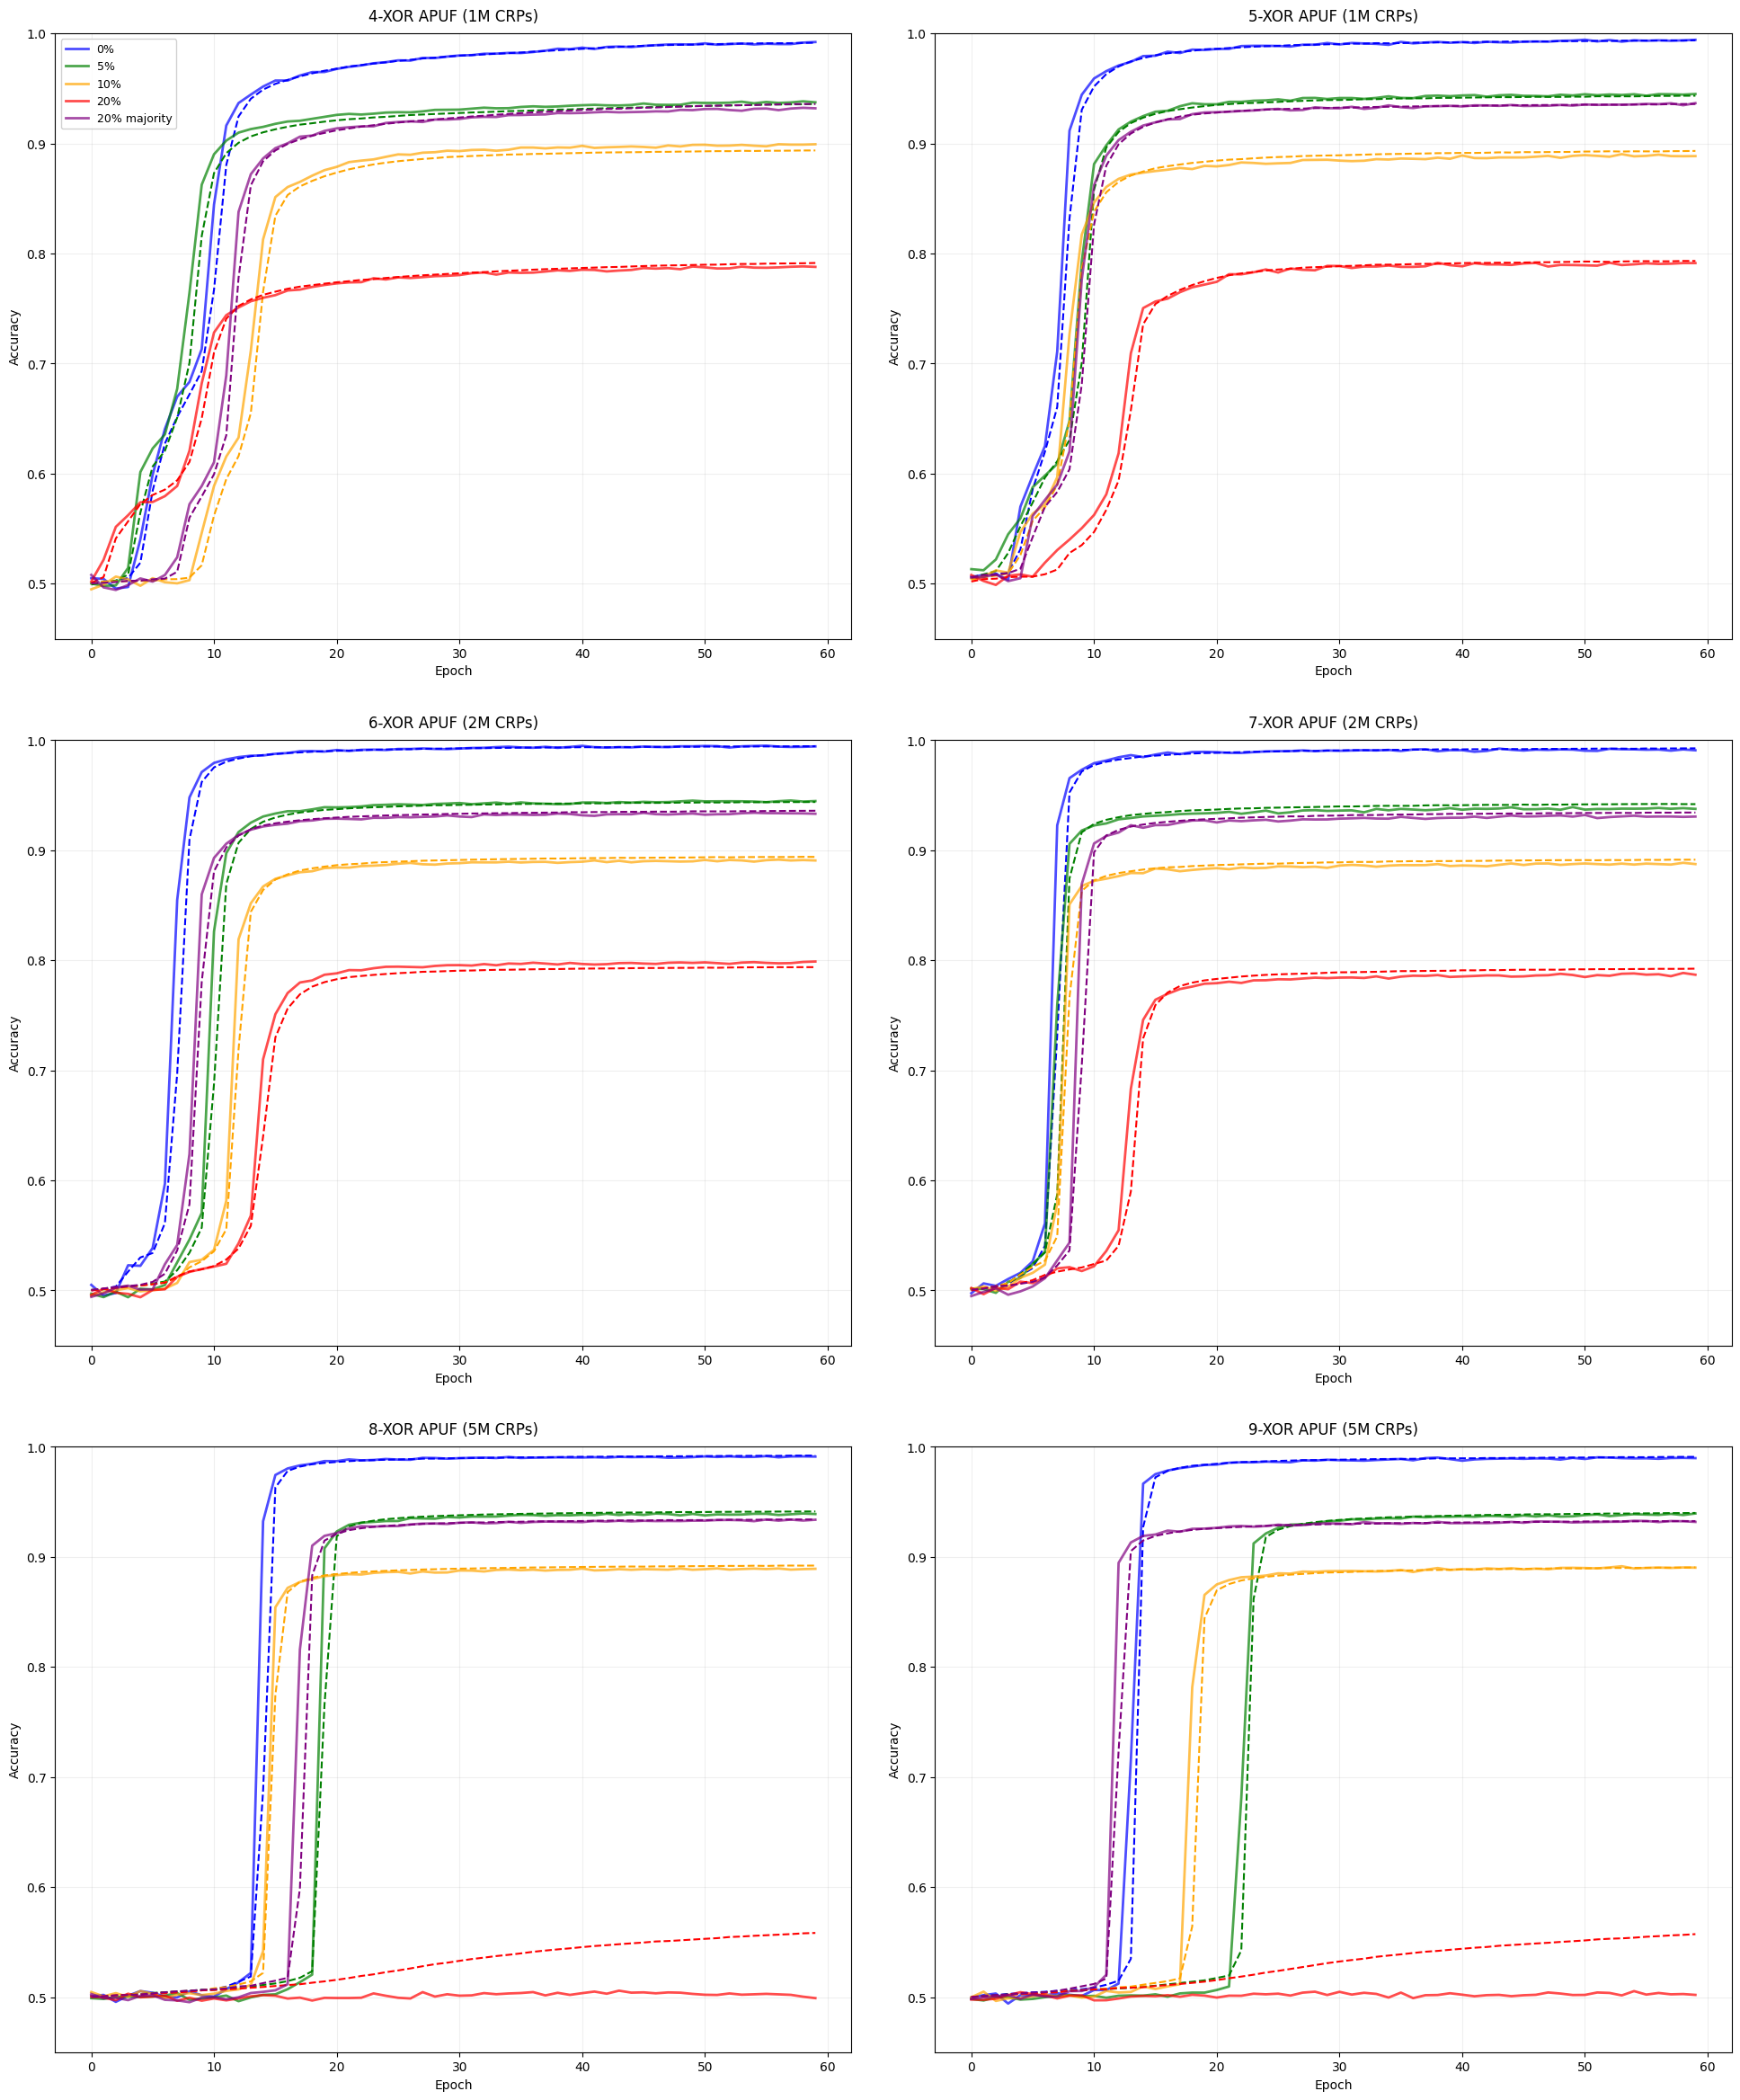

In [29]:
c = ['blue', 'green', 'orange', 'red', 'purple']
plt.figure(figsize=(20, 24))

for plot_idx, k in enumerate(results.keys(), 1):
    ax = plt.subplot(3, 2, plot_idx)
    crps = next(item['crps'] for item in xor_configs if item['k'] == k)
    
    for noise, color in zip(noise_levels, c):
        train_acc = results[k][noise]['train_acc']
        val_acc = results[k][noise]['val_acc']
        
        label = noise.replace('_', ' ').replace('noise', '%')
        ax.plot(train_acc, color=color, linestyle='--', linewidth=1.5)
        ax.plot(val_acc, label=label, color=color, linestyle='-', alpha=0.7, linewidth=2)
    
    ax.set_title(f'{k}-XOR APUF ({crps//1_000_000}M CRPs)', fontsize=12, pad=10)
    ax.set_xlabel('Epoch', fontsize=10)
    ax.set_ylabel('Accuracy', fontsize=10)
    ax.set_ylim(0.45, 1.0)
    ax.grid(True, alpha=0.2)
    
    if plot_idx == 1:
        ax.legend(fontsize=9, framealpha=0.9)

plt.tight_layout(pad=3.0)
plt.savefig('xor_puf_training_curves.png', dpi=500, bbox_inches='tight')
plt.show()